In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt

# Function

In [12]:
def parse_log(_in):
    with open(_in) as f:
        res = json.load(f)

    new_res = []
    ids = []
    for k, v in res.items():
        for v_i in v:
            ids.append(int(k))
            new_res.append(v_i)
    return ids, new_res


In [40]:
def filiter_(idx, res):
    df2 = pd.DataFrame(res, columns=['query', 'backbone', 'subject', 'bs_value', 'dS1', 'dS2'])
    df2['site'] = idx
    keep2_ = df2[(df2.dS1 > df2.dS2) & (df2.bs_value > 0.8)].site
    
    plt.figure(figsize=(15, 3))
    plt.plot(df2.site, df2.bs_value, label='bs_value', linewidth=1, alpha=0.7)
    plt.plot(df2.site, df2.dS1, label='dS1', linewidth=2)
    plt.plot(df2.site, df2.dS2, label='dS2', linewidth=2)
    plt.axhline(0.8, linewidth=2, alpha=0.4, linestyle='-.')
    plt.scatter(x=keep2_, y=[-0.1]*len(keep2_), s=2, c='r')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 

# SARS-CoV-2

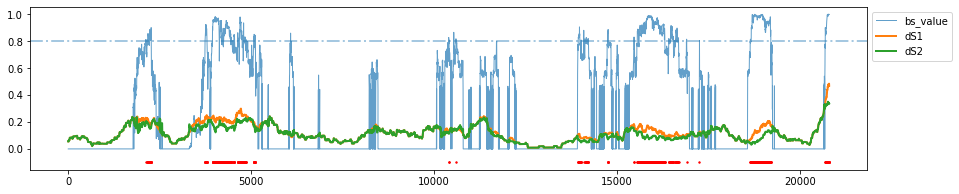

In [55]:
filiter_(*parse_log('./result/SARS-CoV-2.ORF1ab.result'))

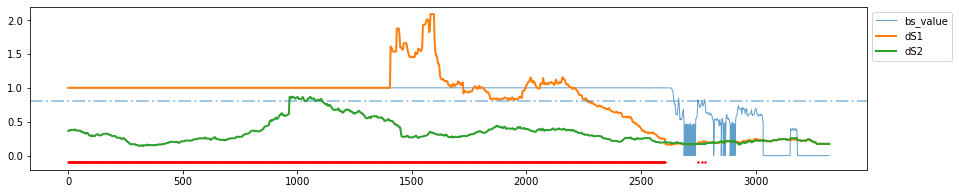

In [41]:
filiter_(*parse_log('./result/SARS-CoV-2.S.result'))

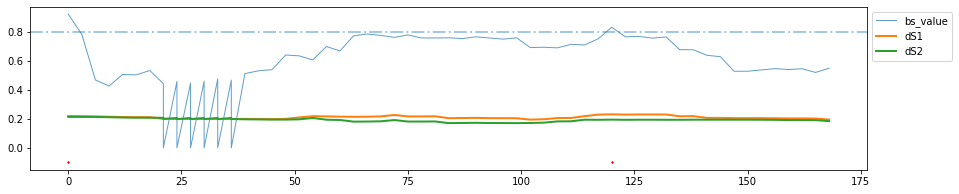

In [42]:
filiter_(*parse_log('./result/SARS-CoV-2.M.result'))

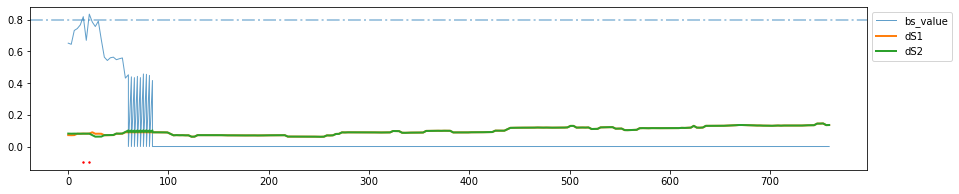

In [43]:
filiter_(*parse_log('./result/SARS-CoV-2.N.result'))

# RmYN02

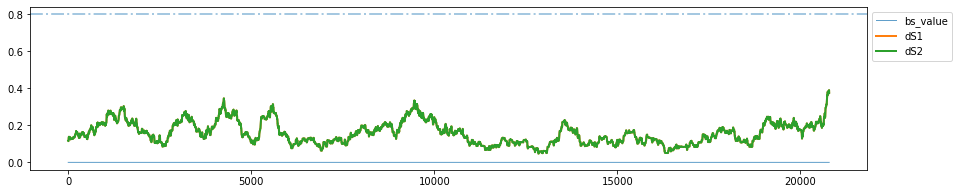

In [45]:
filiter_(*parse_log('./result/RmYN02.ORF1ab.result'))

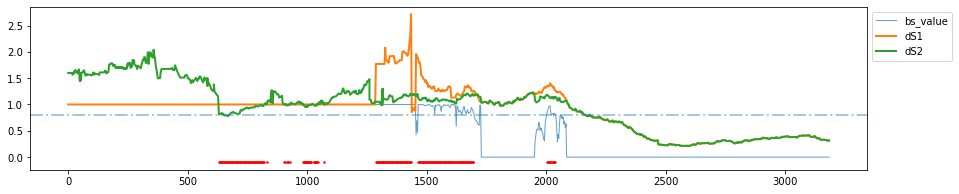

In [46]:
filiter_(*parse_log('./result/RmYN02.S.result'))

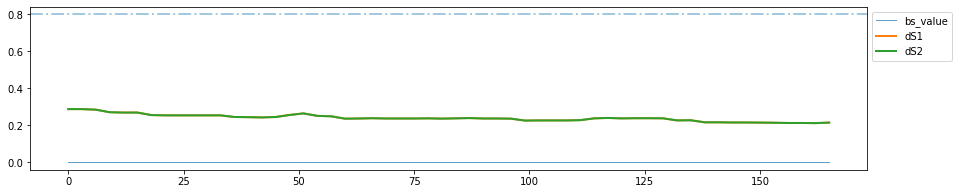

In [48]:
filiter_(*parse_log('./result/RmYN02.M.result'))

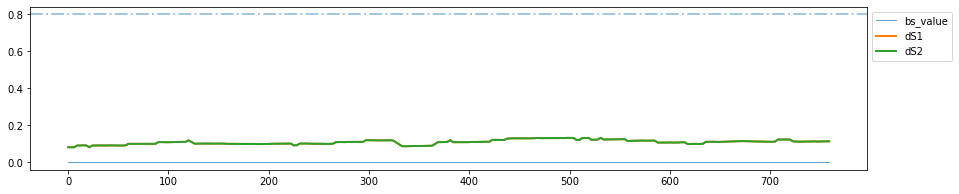

In [49]:
filiter_(*parse_log('./result/RmYN02.N.result'))

# RaTG13

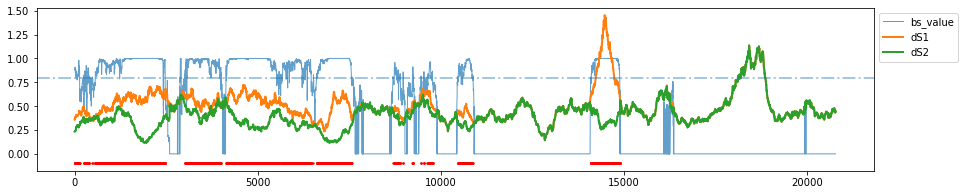

In [50]:
filiter_(*parse_log('./result/RaTG13.ORF1ab.result'))

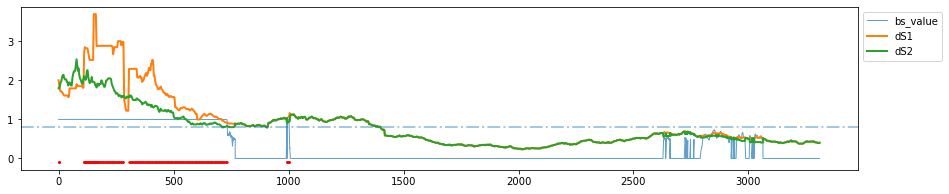

In [51]:
filiter_(*parse_log('./result/RaTG13.S.result'))

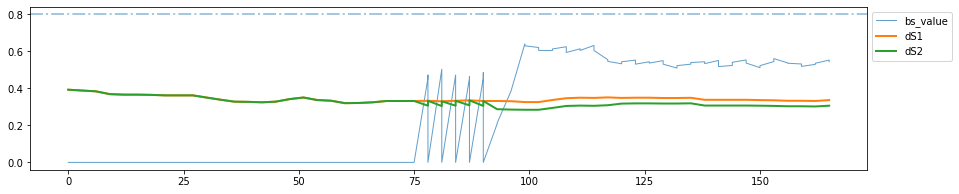

In [52]:
filiter_(*parse_log('./result/RaTG13.M.result'))

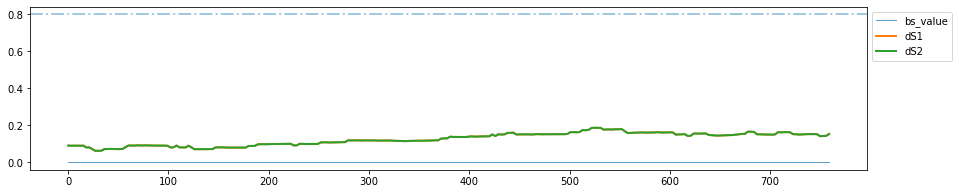

In [53]:
filiter_(*parse_log('./result/RaTG13.N.result'))

# PangolinGD

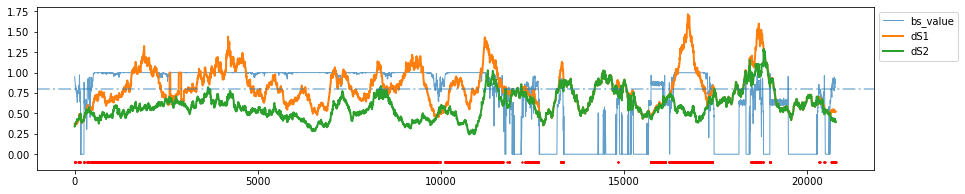

In [54]:
filiter_(*parse_log('./result/PangolinGD.ORF1ab.result'))

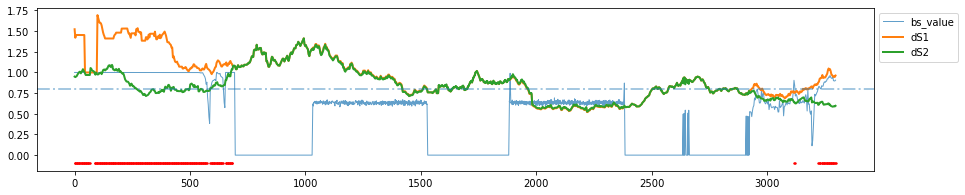

In [56]:
filiter_(*parse_log('./result/PangolinGD.S.result'))